## Importing libraries

In [2]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd

## Load Data and Separating Features and Labels

In [4]:
data=np.loadtxt("Data1.txt")
x=data[:,0:2]
t=data[:,2]
print(len(Data))

560


## Plotting Features

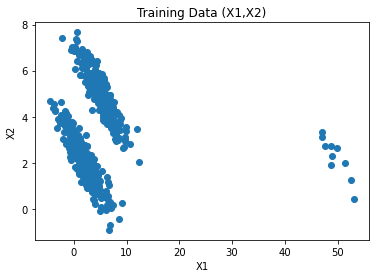

In [6]:
plt.scatter(x[:,0],x[:,1])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Training Data (X1,X2)')
plt.show()

## Plotting Features with colors

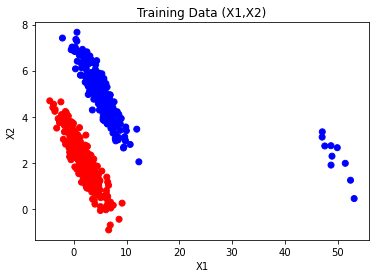

In [7]:
color_cond=['red' if t==-1 else 'blue' for t in t]
plt.scatter(x[:,0],x[:,1],color=color_cond)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Training Data (X1,X2)')
plt.show()

## Calculating Weight Vectors Using Least Square

In [9]:
x0=np.ones((len(x),1)) # creat array of ones as matrix (nx1) where n is number of points
X=np.append(x, x0, axis=1) # add column x0 to data

# w= ( (((X^T)X)^-1 )X^T )t           
XT_X=np.dot(X.T, X)              # (X^T)X
inv_XT_X=np.linalg.inv(XT_X)     # (X^T)X)^-1
X_tot=np.dot(inv_XT_X, X.T)      # ((X^T)X)^-1 )X^T
w=np.dot(X_tot, t)               # ( (((X^T)X)^-1 )X^T )t

print('weight vector')
print(w)

weight vector
[ 0.06097988  0.45821013 -1.86029182]


## Plotting Decision Boundary

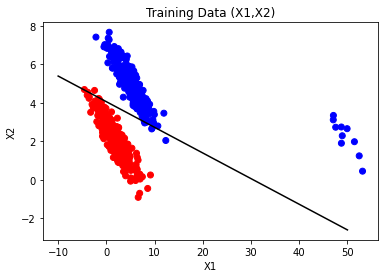

In [11]:
x1_line = np.array([-10, 50])
x2_line = -(w[0]/w[1])*x1_line-(w[2]/w[1]) 

color_cond=['red' if t==-1 else 'blue' for t in t]
plt.scatter(x[:,0],x[:,1],color=color_cond)
plt.plot(x1_line,x2_line,color='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Training Data (X1,X2)')
plt.savefig("Least.jpg")
plt.show()

## Testing Classifier

### Loading Test data

In [13]:
test = np.loadtxt('Test1.txt')
print(test)
x_test = test[:,0:2]
x0_test = np.ones((len(x_test),1)) # creat array of ones as matrix (nx1) where n is number of points
X_test = np.append(x_test, x0_test, axis=1) # add column x0 to data
print('x_test before modification')
print(x_test[0:5])
print('X_test after modification')
print(X_test[0:5])

[[ 5.9114   0.31865]
 [ 1.4706   2.6502 ]
 [-0.93066  3.5615 ]
 [-2.4272   3.8171 ]
 [ 2.9993   1.4877 ]
 [ 7.3897   0.12388]
 [ 0.97881  1.9301 ]
 [ 2.2363   2.5409 ]
 [ 3.3272   1.5701 ]
 [ 2.0631   0.38394]
 [ 2.0709   2.0016 ]
 [ 2.082    2.5281 ]
 [ 2.0026   2.406  ]
 [ 0.72158  2.462  ]
 [ 3.4445   1.594  ]
 [ 0.50737  2.8901 ]
 [ 3.3417   1.1764 ]
 [ 5.5754   1.1987 ]
 [ 4.6996   2.1413 ]
 [ 2.4212   1.3824 ]
 [49.656    2.5533 ]
 [49.637    1.3862 ]
 [50.026    2.5191 ]
 [48.686    2.5927 ]
 [52.521    0.93793]
 [53.887   -0.15672]
 [54.098    0.73924]
 [48.398    2.4613 ]
 [49.098    2.0515 ]
 [48.994    2.1361 ]
 [47.502    3.2169 ]
 [46.779    3.1687 ]
 [47.403    3.2001 ]
 [46.373    3.6654 ]
 [49.69     2.1267 ]
 [48.226    2.1527 ]
 [47.733    2.6811 ]
 [51.132    1.4697 ]
 [52.126    1.7297 ]
 [49.462    1.8757 ]]
x_test before modification
[[ 5.9114   0.31865]
 [ 1.4706   2.6502 ]
 [-0.93066  3.5615 ]
 [-2.4272   3.8171 ]
 [ 2.9993   1.4877 ]]
X_test after modification


### Classify Test Data

In [14]:
y=np.dot(w.T, X_test.T)
t_test=[]
for i in range(len(y)):
    if(y[i]<=0):
        t_test.append(-1)
    else:
        t_test.append(1)
print('Test data classfication (target vector of test data)')
print(t_test)


Test data classfication (target vector of test data)
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


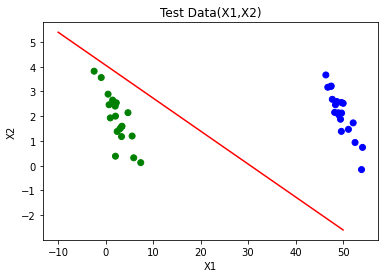

In [15]:
color_cond= ['blue' if t == 1 else 'green' for t in t_test]
plt.scatter(test[:,0],test[:,1], label='Test Data', color=color_cond) # ploting X1 vs X2
plt.plot(x1_line, x2_line,label='Decision boundary', color='r')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Test Data(X1,X2)')
#plt.legend()
plt.show()


### Read Excel file and save class vector(t) into Excel

In [16]:
df = pd.read_excel('Least Squares.xls') #Read Excel file as a DataFrame
df["T"]=t_test
df.to_excel('Least Squares.xls') #Write DateFrame back as Excel file